In [32]:
import pandas as pd

import matplotlib.pyplot as plt
import missingno as msno
from matplotlib.ticker import FormatStrFormatter
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score as cvs
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import RandomizedSearchCV as RSCV
from sklearn.neural_network import MLPClassifier as MLP

import numpy as np
from scipy.stats import randint
import pickle

## Data Preparation

In [ ]:
!gdown 19l3gdagQO2CRWVnVvCiWx7NLg-9b3gJR

Downloading...
From: https://drive.google.com/uc?id=19l3gdagQO2CRWVnVvCiWx7NLg-9b3gJR
To: /content/df_out.csv
100% 32.0M/32.0M [00:00<00:00, 101MB/s]


In [ ]:
df = pd.read_csv('df_out.csv')
print('Размер выборки: {}:{}'.format(df.shape[0], df.shape[1]))
df.head()

Размер выборки: 10000:20


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


### Разведочный анализ данных | EDA | Data Cleaning

In [ ]:
print('Инофрмация о выборке:\n')
df.info()

Инофрмация о выборке:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    10000 non-null  object 
 7   model           9872 non-null   object 
 8   fuel            9937 non-null   object 
 9   odometer        10000 non-null  int64  
 10  title_status    9834 non-null   object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_d

Отображение проседающих по заполненным значениям признаков:



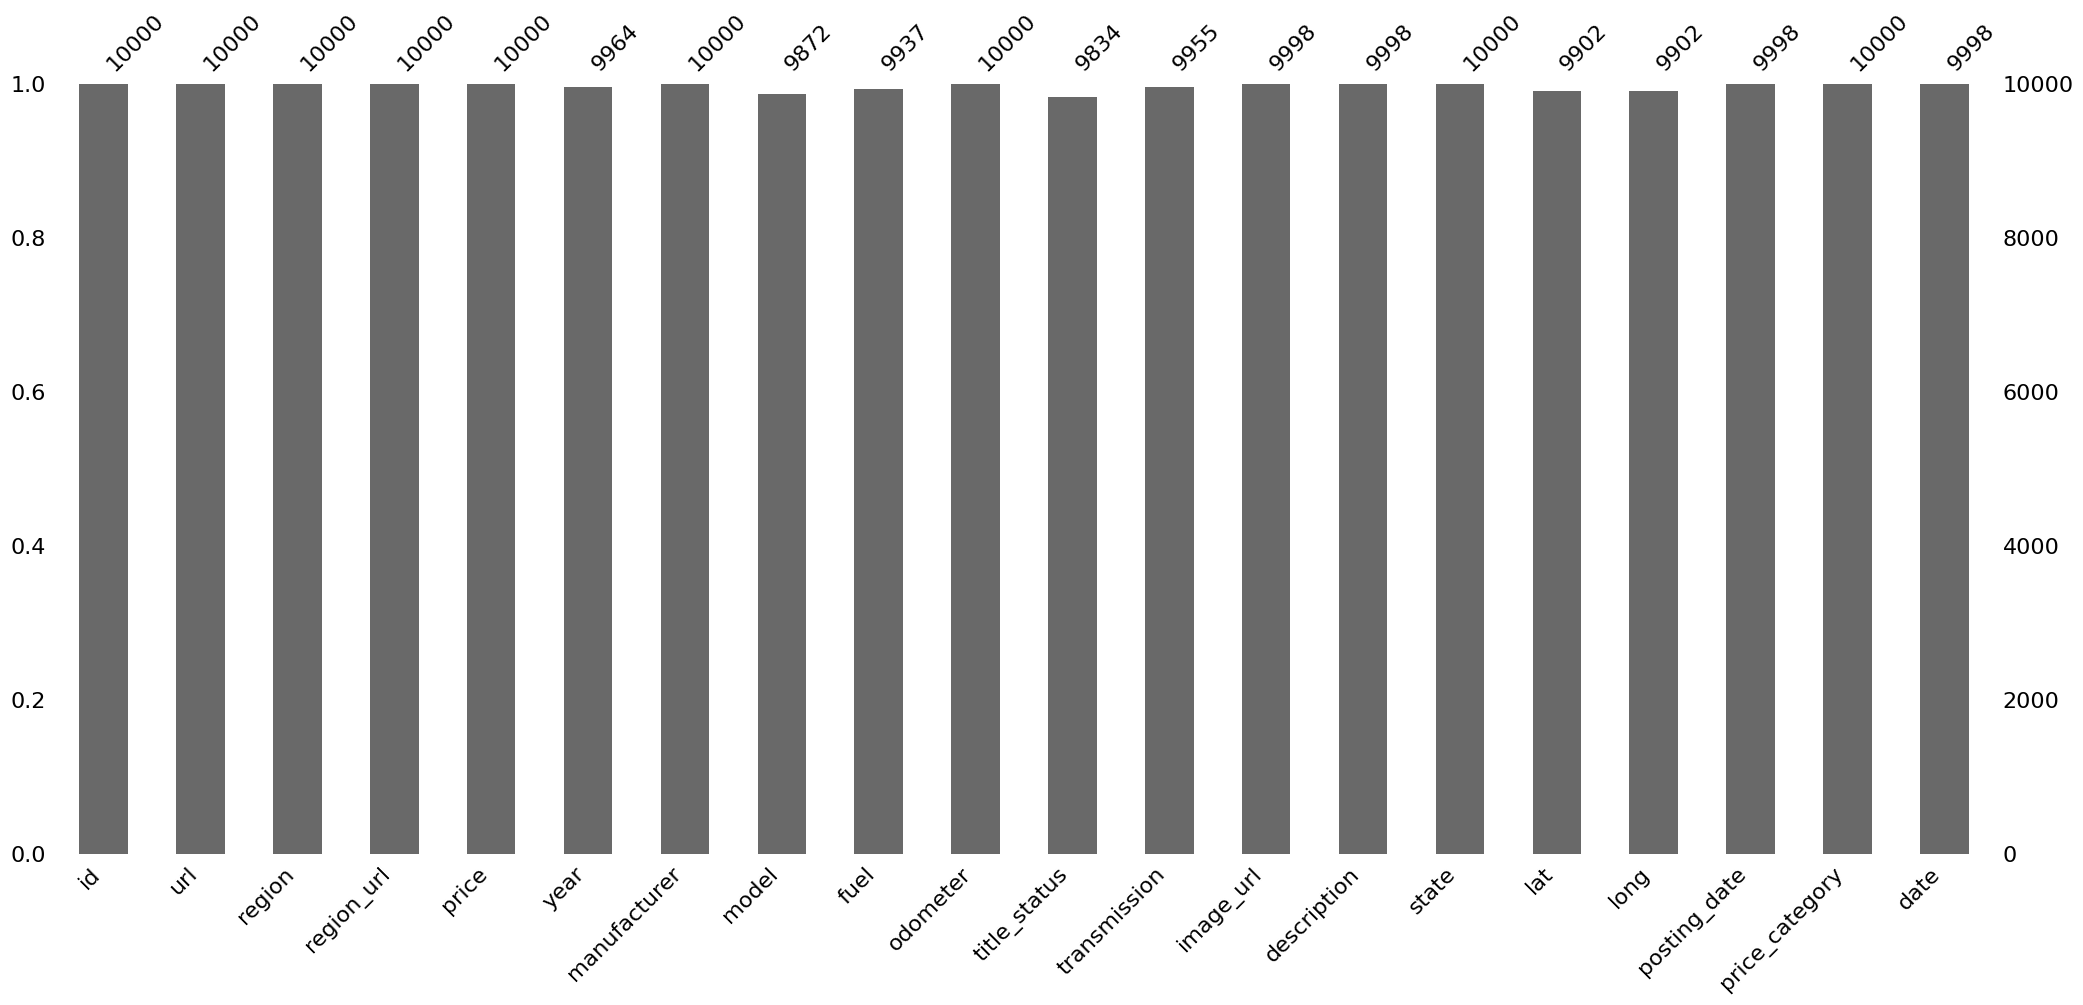

In [ ]:
print('Отображение проседающих по заполненным значениям признаков:\n')
msno.bar(df);

Матрица пропусков, повторяющая структуру датасета:



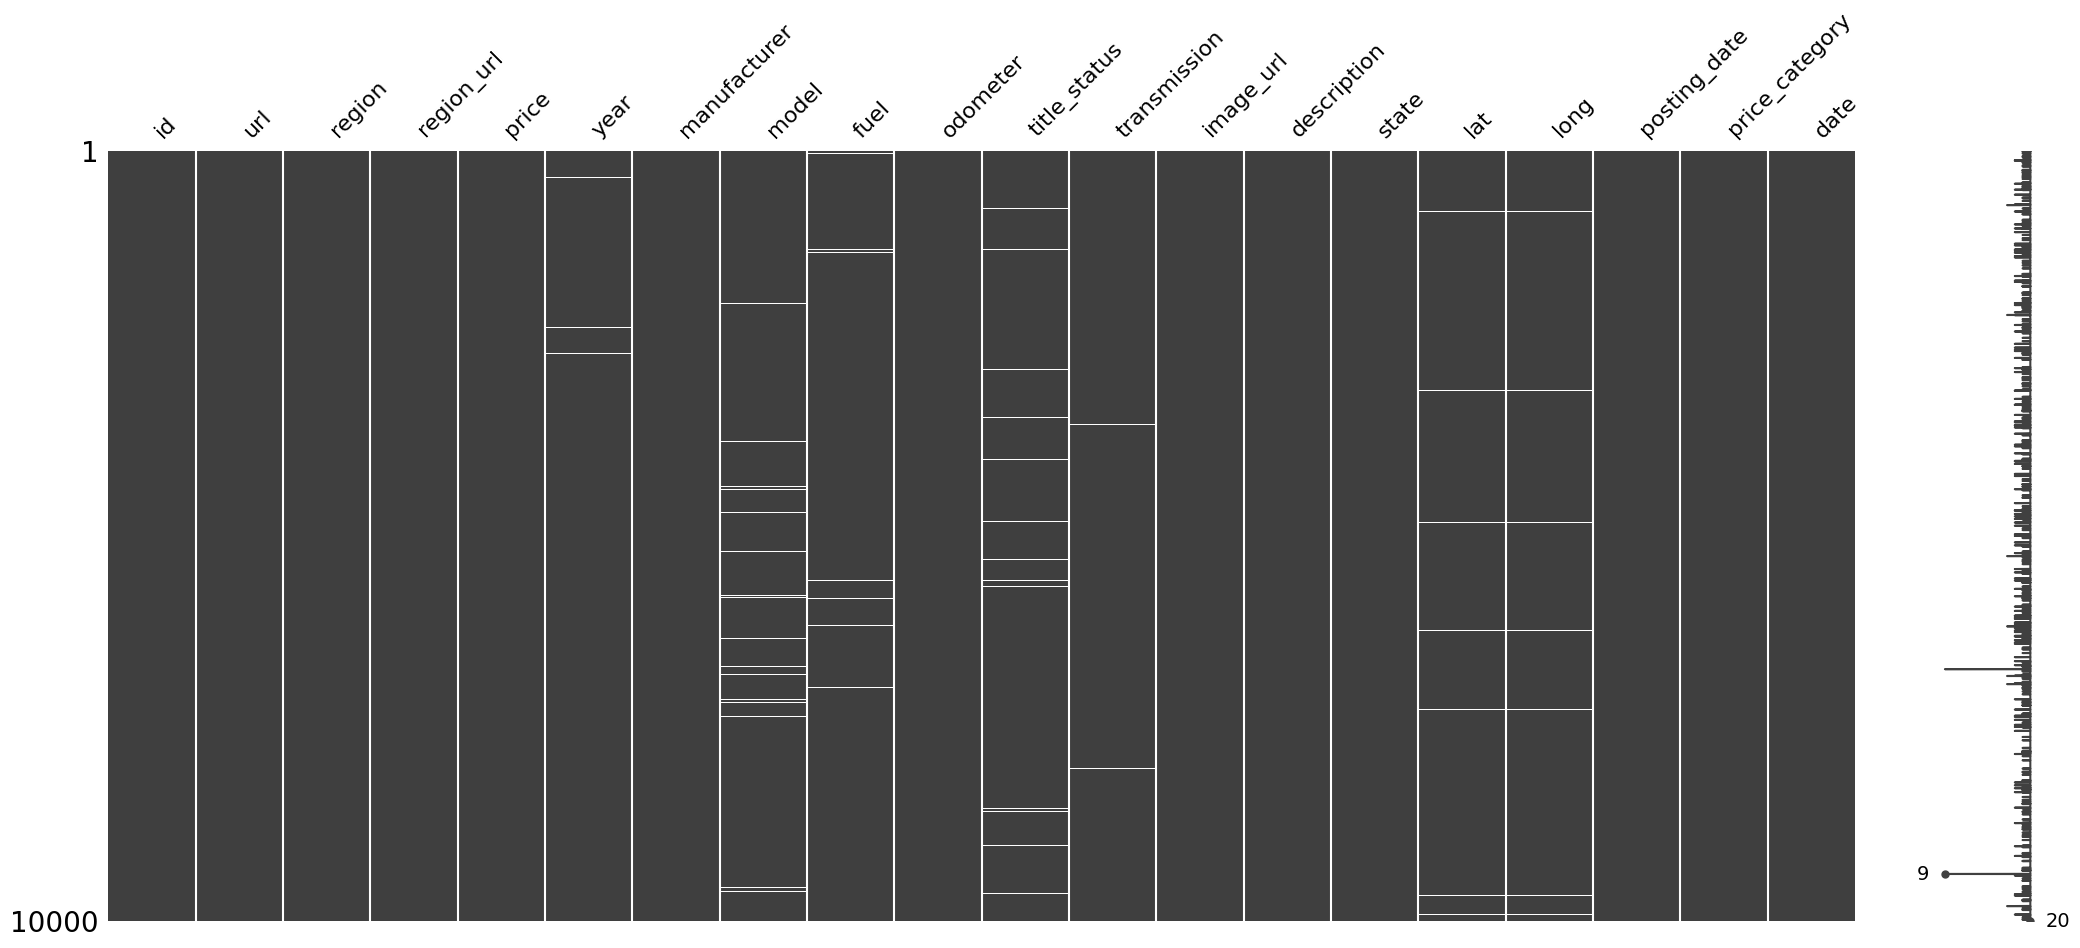

In [ ]:
print('Матрица пропусков, повторяющая структуру датасета:\n')
msno.matrix(df);

In [ ]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values()
print('Процент пропущенных значений по каждому признаку:\n')
missing_values # обрабатывать будем прпоуски с процентом больше 0.02

Процент пропущенных значений по каждому признаку:



id                0.00
state             0.00
price_category    0.00
manufacturer      0.00
odometer          0.00
region_url        0.00
region            0.00
url               0.00
price             0.00
image_url         0.02
description       0.02
posting_date      0.02
date              0.02
year              0.36
transmission      0.45
fuel              0.63
lat               0.98
long              0.98
model             1.28
title_status      1.66
dtype: float64

In [ ]:
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки:', len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', round(len(df.dropna()) / len(df) * 100, 2))

print_useful_rows_info(df) # Задачей дата клининга будет уменьшить количество пропусков в датасете.

Количество полностью заполненных объектов из всей выборки: 9507
Процент полностью заполненных объектов из всей выборки: 95.07


#### Работа по признаку год авто

In [ ]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries

calculate_outliers(df.year) # все что выходит за эти рамки - аномалии, а точнее выбросы, которые могут повлиять на меры центральной теденции распредления значений по признаку

(1994.5, 2030.5)

In [ ]:
year_outlier = (df.year < calculate_outliers(df.year)[0]) | (df.year > calculate_outliers(df.year)[1])
print(f'количество выбрасов в годе автомобиля: {year_outlier.sum()}')

количество выбрасов в годе автомобиля: 394


In [ ]:
# Замена значений выбрасов на крайние значения "усов ящика"
df['year'] = df['year'].clip(calculate_outliers(df.year)[0], calculate_outliers(df.year)[1])

In [ ]:
year_outlier_upd = (df.year < calculate_outliers(df.year)[0]) | (df.year > calculate_outliers(df.year)[1])
print(f'количество выбрасов в годе автомобиля: {year_outlier_upd.sum()}')

количество выбрасов в годе автомобиля: 0


In [ ]:
print('Мода по признаку год является:', df.year.mode()) # теперь, когда выбросы были заменены крайними значениями усов, можно заполнять пропуски мерой центральной тенденции.
df[df['year'].isna()][['description']] # в описании можно увидеть значения, отсутсвующие в колонке "год", именно поэтому я выбрал моду, как наиболее близкое из 3  МЦТ значений к значениям записанным в описании.

Мода по признаку год является: 0    2018.0
Name: year, dtype: float64


,description
344,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...
420,2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...
425,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ..."
702,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...
893,"2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9..."
906,2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...
1005,"2019 *Dodge* *Grand Caravan* SE - $38,900Call ..."
1217,"2019 *Honda* *CR-V* EX 2WD SUV - $24,975Call o..."
1319,2018 *Toyota* *Sienna* LE Automatic Access Sea...
1845,"2020 *Ford* *Transit Cargo Van* T-250 148"" WB*..."


In [ ]:
df['year'] = df['year'].fillna(int(df['year'].mode())) # подставляем значение моды в пропущенные записи колонки year
df['year'] = df['year'].astype(int)
df.year.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: year
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


<ipython-input-118-1d821e323441>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df['year'] = df['year'].fillna(int(df['year'].mode())) # подставляем значение моды в пропущенные записи колонки year


#### Работа по признаку трансмиссия

In [ ]:
df['transmission'].value_counts(dropna=False) # смотрим какие значения есть в колонке трансмиссия

transmission
automatic    7700
other        1624
manual        631
NaN            45
Name: count, dtype: int64

In [ ]:
# в категариальный признак могли бы проставить пустующие значения, значением моды, но при наличии категори "другие". пропишем "other"
df['transmission'] = df['transmission'].fillna('other')

In [ ]:
df['transmission'].value_counts() # еще раз проверяем, если остались пропуски

transmission
automatic    7700
other        1669
manual        631
Name: count, dtype: int64

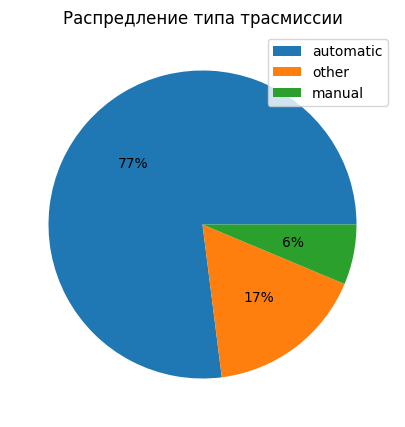

In [ ]:
plt.figure(figsize=(8, 5)) # рисуем пирог, распределения трансмиссии, после заполнения пропусков.
plt.pie(df['transmission'].value_counts(), labels=df['transmission'].value_counts().index, labeldistance=None, autopct='%1.0f%%')
plt.title("Распредление типа трасмиссии")
plt.legend(loc='upper right')
plt.show;

#### Работа по признаку топливо

In [ ]:
df['fuel'].value_counts(dropna=False) # смотрим какие значения есть в колонке

fuel
gas         8402
other        730
diesel       653
hybrid       108
NaN           63
electric      44
Name: count, dtype: int64

In [ ]:
df['fuel'] = df['fuel'].fillna('other') # так же заменяем пустующие значение категорией "other"
df['fuel'].value_counts(dropna=False) #  и проверим на пропуски

fuel
gas         8402
other        793
diesel       653
hybrid       108
electric      44
Name: count, dtype: int64

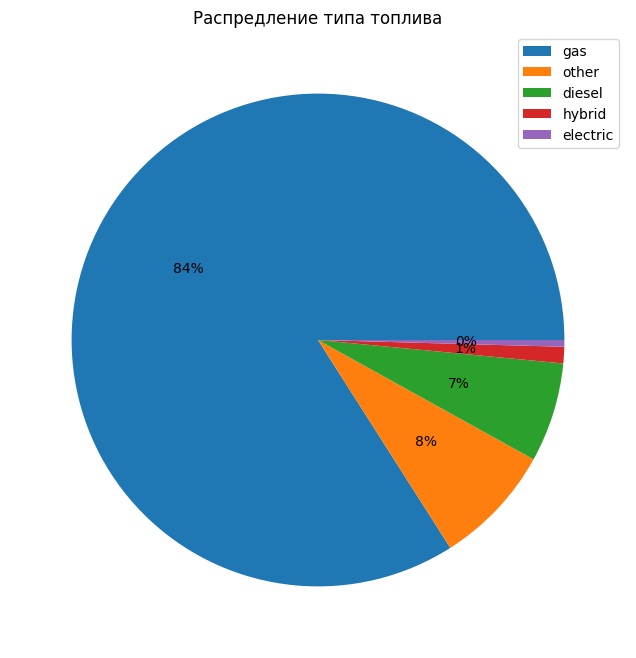

In [ ]:
plt.figure(figsize=(12, 8)) # рисуем пирог, распределения типа топлива, после заполнения пропусков.
plt.pie(df['fuel'].value_counts(), labels=df['fuel'].value_counts().index, labeldistance=None, autopct='%1.0f%%')
plt.title("Распредление типа топлива")
plt.legend(loc='upper right')
plt.show;

#### Работа по признакам долгота-широта

In [ ]:
df.long.value_counts(dropna=False) # смотрим на количество пропусков

long
 NaN          98
-84.112200    88
-84.411811    79
-74.281707    73
-84.445400    54
              ..
-82.527995     1
-97.031100     1
-85.806306     1
-78.625588     1
-79.189500     1
Name: count, Length: 5083, dtype: int64

In [ ]:
df.lat.value_counts(dropna=False) # смотрим на количество пропусков

lat
NaN          98
43.182400    88
33.779214    79
40.468785    73
33.786500    54
             ..
33.640251     1
39.942263     1
34.299800     1
44.472801     1
42.123900     1
Name: count, Length: 5050, dtype: int64

In [ ]:
# нужно убедиться что долгота и широта не заполнены в одних и тех же строках.
(df.lat.isna() | df.long.isna()).sum()

98

In [ ]:
df = df[~(df.lat.isna() | df.long.isna())]
print('Осталосль строк после удаления', df.shape[0])

Осталосль строк после удаления 9902


#### Работа по признаку title_status

In [ ]:
df['title_status'].value_counts(dropna=False) # смотрим на пропуски

title_status
clean         9423
rebuilt        171
NaN            164
salvage         91
lien            35
missing         16
parts only       2
Name: count, dtype: int64

In [ ]:
mode = df.title_status.mode() # пропуски заменяются на моду так как это категориальный признак
df.title_status = df.title_status.fillna(mode[0])

In [ ]:
df['title_status'].value_counts(dropna=False) # проверка наличия пропусков

title_status
clean         9587
rebuilt        171
salvage         91
lien            35
missing         16
parts only       2
Name: count, dtype: int64

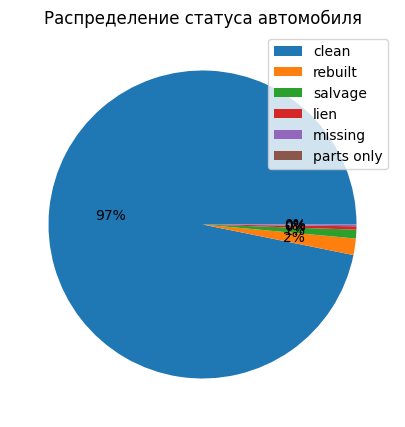

In [ ]:
plt.figure(figsize=(8, 5)) # рисуем пирог, распределения состояния авто, после заполнения пропусков.
plt.pie(df['title_status'].value_counts(), labels=df['title_status'].value_counts().index, labeldistance=None, autopct='%1.0f%%')
plt.title("Распределение статуса автомобиля")
plt.legend(loc='upper right')
plt.show;

#### Работа по признаку модель авто

In [ ]:
df['model'].value_counts(dropna=False).head()  # смотрим количество пропусков в значениях

model
f-150             148
NaN               126
silverado 1500    106
1500              100
camry              76
Name: count, dtype: int64

In [ ]:
df['model'] = df['model'].fillna('other') # заменяем прпоуски на категорию "другие"
df['model'].value_counts().head()

model
f-150             148
other             126
silverado 1500    106
1500              100
camry              76
Name: count, dtype: int64

In [ ]:
# Вновь смотрим на количество пропусков данных после обработки
print_useful_rows_info(df) # Задачей дата клининга будет уменьшить количество пропусков в датасете.

Количество полностью заполненных объектов из всей выборки: 9902
Процент полностью заполненных объектов из всей выборки: 100.0


### Разведочный анализ | Data Visualisation

In [ ]:
# Еще раз выведим информацию по массиву, что бы убедиться в отсутсвии пропусков, перед графической работой с данными.
# В этом блоке работа будет посвещена визуализации наличия выбрасов в суб-целевой переменной: стоимоть автомобиля
print('Инофрмация о выборке:\n')
df.info()

Инофрмация о выборке:

<class 'pandas.core.frame.DataFrame'>
Index: 9902 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9902 non-null   int64  
 1   url             9902 non-null   object 
 2   region          9902 non-null   object 
 3   region_url      9902 non-null   object 
 4   price           9902 non-null   int64  
 5   year            9902 non-null   int64  
 6   manufacturer    9902 non-null   object 
 7   model           9902 non-null   object 
 8   fuel            9902 non-null   object 
 9   odometer        9902 non-null   int64  
 10  title_status    9902 non-null   object 
 11  transmission    9902 non-null   object 
 12  image_url       9902 non-null   object 
 13  description     9902 non-null   object 
 14  state           9902 non-null   object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date   

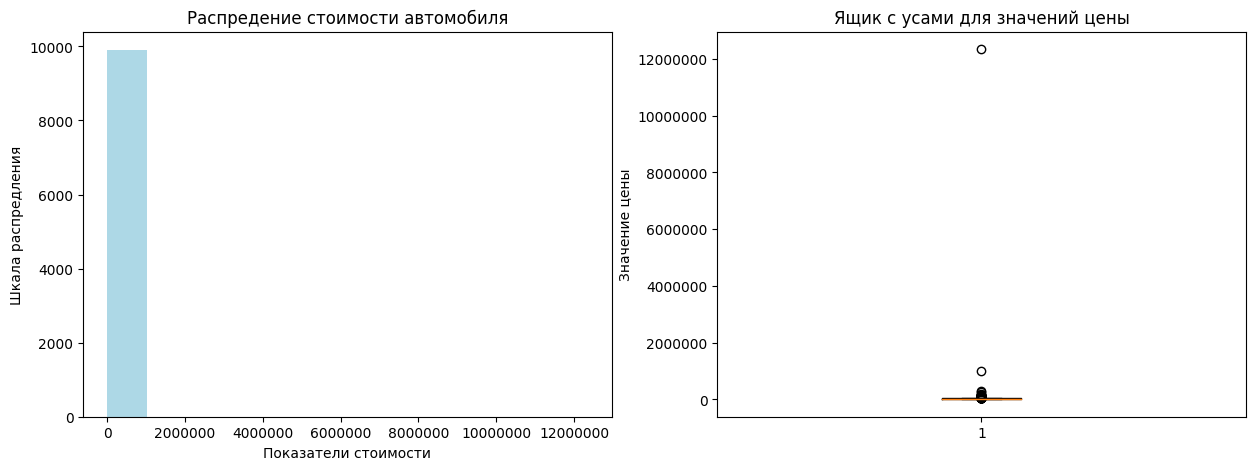

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.hist(df.price, bins=12, color='lightblue')
ax2.boxplot(df.price)

ax1.set_xlabel('Показатели стоимости')
ax1.set_ylabel('Шкала распредления')
ax2.set_ylabel('Значение цены')
ax1.set_title('Распредение стоимости автомобиля')
ax2.set_title('Ящик с усами для значений цены')

ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2.yaxis.set_major_formatter('{:.0f}'.format);
# Гистограмма показывает основное расположение значений стоимости, когда ящик с усами показывает наличие серьезных выбрасов, которые сильно искажают исследовательскую картину.

In [ ]:
is_outlier = (df.price < calculate_outliers(df.price)[0]) | (df.price > calculate_outliers(df.price)[1])
print(f'Количество выбрасов в стоимости автомобиля: {is_outlier.sum()}')

Количество выбрасов в стоимости автомобиля: 215


In [ ]:
df_corr = df.copy()
df_corr = df_corr.select_dtypes(include=['int', 'float']).drop(columns='id', axis=1) # выбираем численные переменные для подсчета корреляций

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Print the correlation matrix
print(corr_matrix) # год и пробег автомобиля только намекают на наличие корреляции, возможно проблема именно в наличии выбросов

             price      year  odometer       lat      long
price     1.000000  0.072368 -0.058141  0.001935 -0.001776
year      0.072368  1.000000 -0.501092 -0.032992  0.006759
odometer -0.058141 -0.501092  1.000000  0.025911  0.009576
lat       0.001935 -0.032992  0.025911  1.000000 -0.163514
long     -0.001776  0.006759  0.009576 -0.163514  1.000000


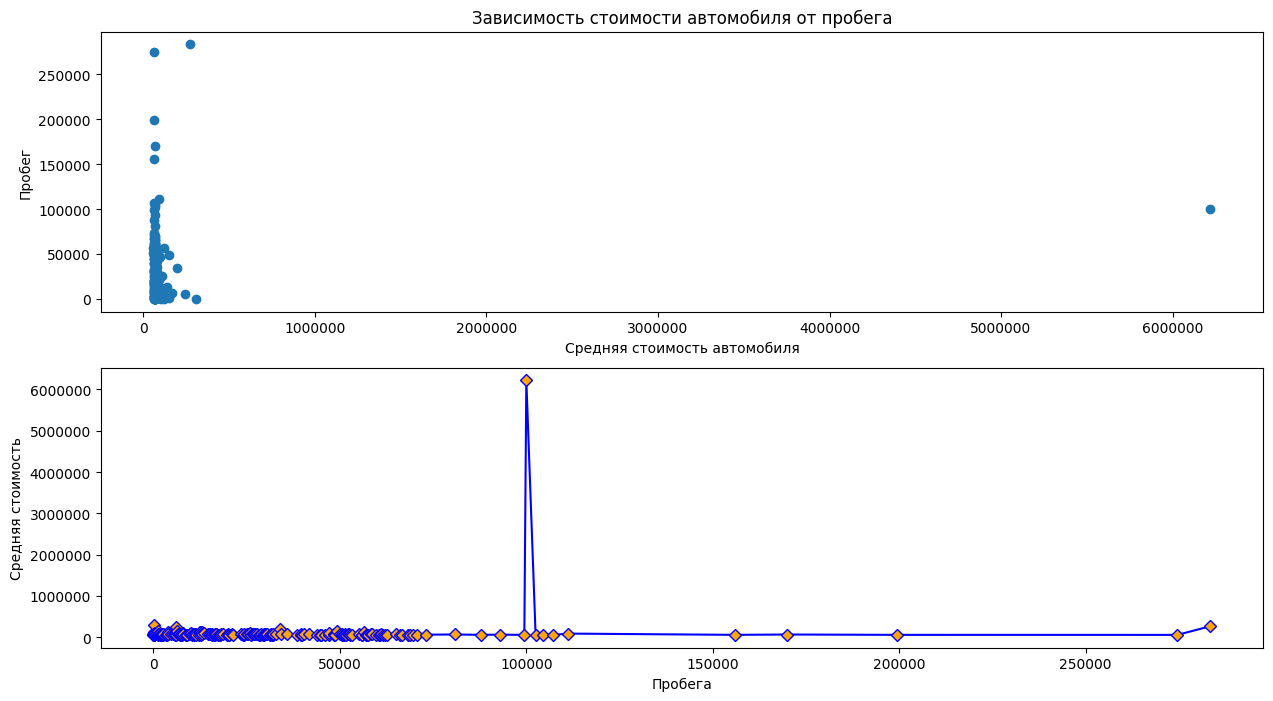

In [ ]:
price_vs_odometer = df[is_outlier].groupby(['odometer'], as_index=False).agg({'price': 'mean'})
price_vs_odometer = price_vs_odometer.rename(columns={'price': 'mean_price'})

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
ax1.scatter(price_vs_odometer['mean_price'], price_vs_odometer['odometer'])

ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax1.set_title('Зависимость стоимости автомобиля от пробега')
ax1.set_xlabel('Средняя стоимость автомобиля')
ax1.set_ylabel('Пробег')

ax2.plot(price_vs_odometer.odometer, price_vs_odometer.mean_price, marker='D', color='blue', markerfacecolor='orange')
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2.set_xlabel('Пробега')
ax2.set_ylabel('Средняя стоимость');
# даже среди выбрасов есть выбросы, это можно увидеть на графиках ниже, где размещались только 215 записей-выбрасов из основного массива

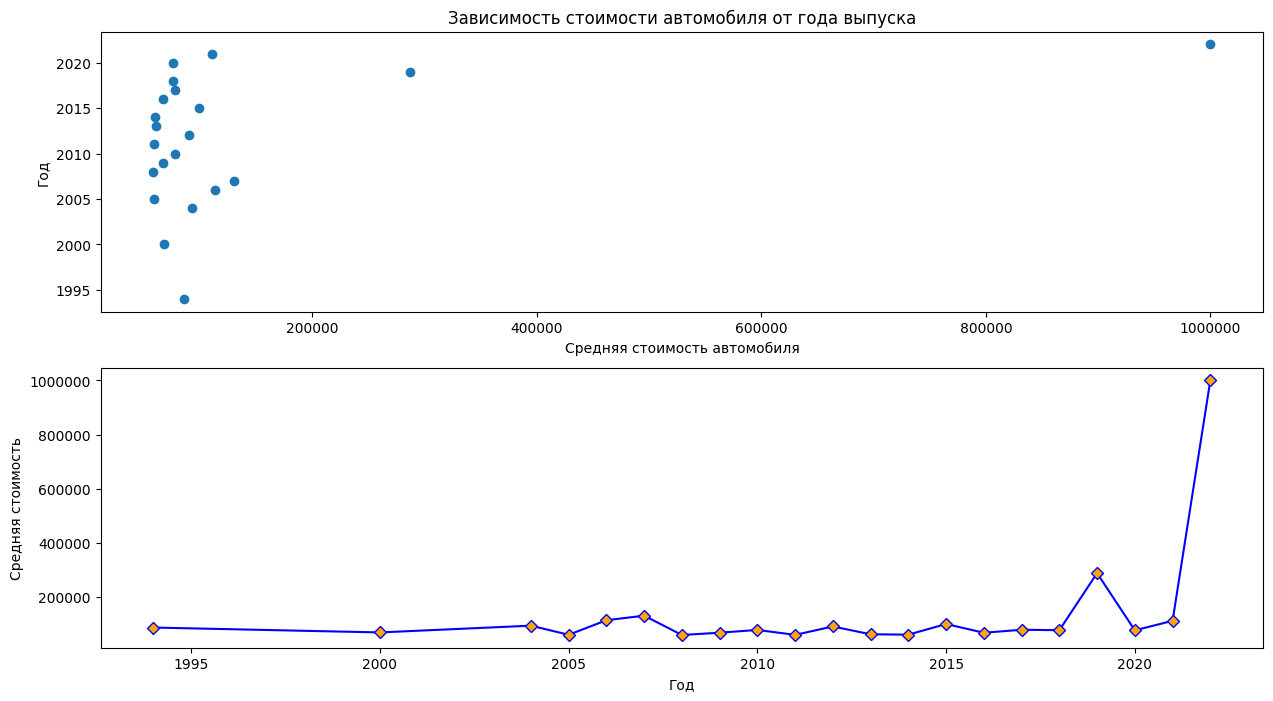

In [ ]:
price_vs_year = df[is_outlier].groupby(['year'], as_index=False).agg({'price': 'mean'})
price_vs_year = price_vs_year.rename(columns={'price': 'mean_price'})

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
ax1.scatter(price_vs_year['mean_price'], price_vs_year['year'])

ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax1.set_title('Зависимость стоимости автомобиля от года выпуска')
ax1.set_xlabel('Средняя стоимость автомобиля')
ax1.set_ylabel('Год')

ax2.plot(price_vs_year.year, price_vs_year.mean_price, marker='D', color='blue', markerfacecolor='orange')
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2.set_xlabel('Год')
ax2.set_ylabel('Средняя стоимость');
# для более удобного визуального анализа и статистических показателей, лучше всего удалить выбросы из всего массива.

In [ ]:
# убираю 215 выбросов по всем значениям стоимости автомобиля и проверяю как изменилась корреляция между ценой/пробегом и ценой/годом
df_outlier = df_corr[is_outlier].sort_values(by='price', ascending=False).head(215)
df_corr = df_corr.drop(df_outlier.index)
df_corr.corr() # корреляции стали более выраженными 54% и 53% это все так же слабые корреляции, но теперь без вырасов они хотябы видны

,price,year,odometer,lat,long
price,1.000000,0.543594,-0.532709,-0.016154,-0.049329
year,0.543594,1.000000,-0.496516,-0.031936,0.015795
odometer,-0.532709,-0.496516,1.000000,0.025584,-0.000007
lat,-0.016154,-0.031936,0.025584,1.000000,-0.133277
long,-0.049329,0.015795,-0.000007,-0.133277,1.000000


In [ ]:
# теперь есть обоснование почему стоит удалить 215 выбрасов из исходного массива данных
df_outlier = df[is_outlier].sort_values(by='price', ascending=False).head(215)
df = df.drop(df_outlier.index)

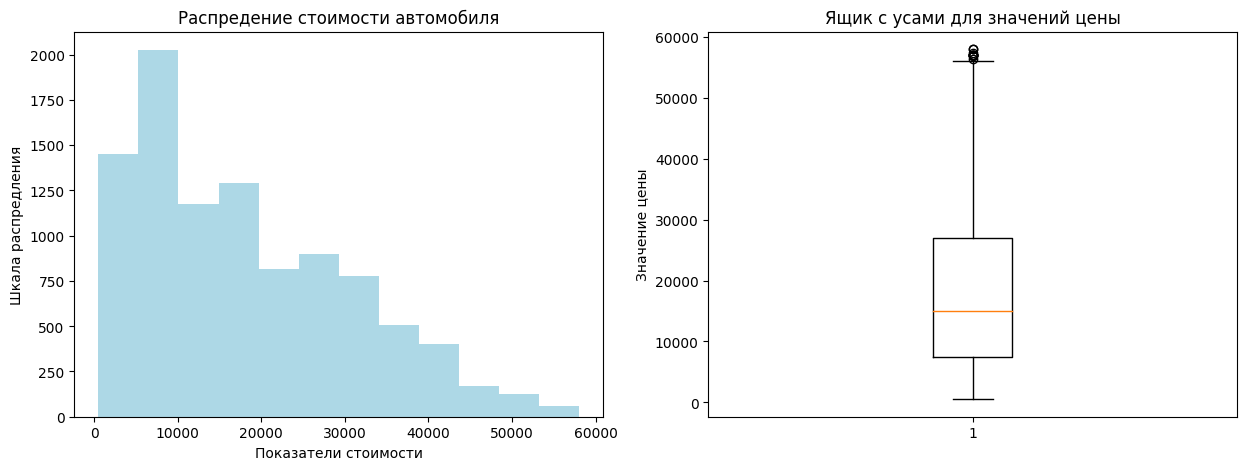

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.hist(df.price, bins=12, color='lightblue')
ax2.boxplot(df_corr.price)

ax1.set_xlabel('Показатели стоимости')
ax1.set_ylabel('Шкала распредления')
ax2.set_ylabel('Значение цены')
ax1.set_title('Распредение стоимости автомобиля')
ax2.set_title('Ящик с усами для значений цены')

ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2.yaxis.set_major_formatter('{:.0f}'.format);
# после удаления выбрасов можно хотябы визуально наблюдать и анализировать данные

In [ ]:
is_outlier_upd = (df.price < calculate_outliers(df.price)[0]) | (df.price > calculate_outliers(df.price)[1])
print(f'Количество выбрасов в стоимости автомобиля после удаления 215 выбрасов: {is_outlier_upd.sum()}')

Количество выбрасов в стоимости автомобиля после удаления 215 выбрасов: 10


In [ ]:
# 10 выбрасов по цене не лежат сильно далеко от верхнего уса ящика, они не могут повлиять значительно на дальнейшую работу
print('Объем данных после визуального анализа составляет:', df.shape[0])

Объем данных после визуального анализа составляет: 9687


## Feature Engineering

### Создание новых фичей и удаление не нужных  

#### Фичи - Пробег, Цена

In [ ]:
# по логие вищей и слабой корреляции, показатель пробега имеет прямое влияние на показатель цена авто. А для облегчения понимания, пробега в милях лучше перевести в пробег в километрах. Значит стоит вывести новые пизнаки ododmeter/price и odometer_km
df['odometer_km'] = df.apply(lambda x: round(x['odometer'] * 1.609344), axis=1)
df['odometer/price'] = df.apply(lambda x: x.odometer / x.price, axis=1)
print(f'Показатели корреляции для пробега в км: {df["odometer_km"].corr(df["odometer"]):.2f} и для отношения пробег/цена: {df["odometer/price"].corr(df["odometer"]):.2f} к показателям пробега')

Показатели корреляции для пробега в км: 1.00 и для отношения пробег/цена: 0.52 к показателям пробега


In [ ]:
df[['odometer/price', 'odometer_km']].head() # а старый показатель пробега в милях, удалим.

,odometer/price,odometer_km
0,0.499036,44164
1,3.542852,96598
2,0.394718,22608
3,8.089034,188762
4,0.366972,12875


In [ ]:
df.drop(columns='odometer', inplace=True) # удаляем

In [ ]:
df['price_k$'] = df.apply(lambda x: round(x.price / 1000), axis=1) # округлим цену до тысяч долларов, создав новый признак
df['price_k$'].corr(df['price']) # старый признак цены удалим, так как имеем прямую, сильную корреляцию, между признаками.

0.9998005791374296

In [ ]:
df.drop(columns='price', inplace=True) # удаляем

#### Фича - регион

In [ ]:
df['region_corrected'] = df['region'].apply(lambda x: x.lower().split('/')[0].replace(' ', '').replace('-', '')) # названия в колонке регион оставляют желать лучшего - их нужно причесать
df['region_new'] = df.region_url.apply(lambda x: x.lower().split('://')[1].split('.')[0]) # делаем новый признак региона из адресной строки, где записан регион как надо
df[df['region_corrected'] != df['region_new']].shape # проверка на совпадение

(2471, 23)

In [ ]:
df.region_new.nunique() # 405 уникальных регионов больше чем 390 из скорректированных старых

405

In [ ]:
df.region_corrected.nunique() # поэтому старые записи по регионам будут удалены.

390

In [ ]:
df.drop(columns='region_corrected', inplace=True) # удаляем

#### Фича - Описание

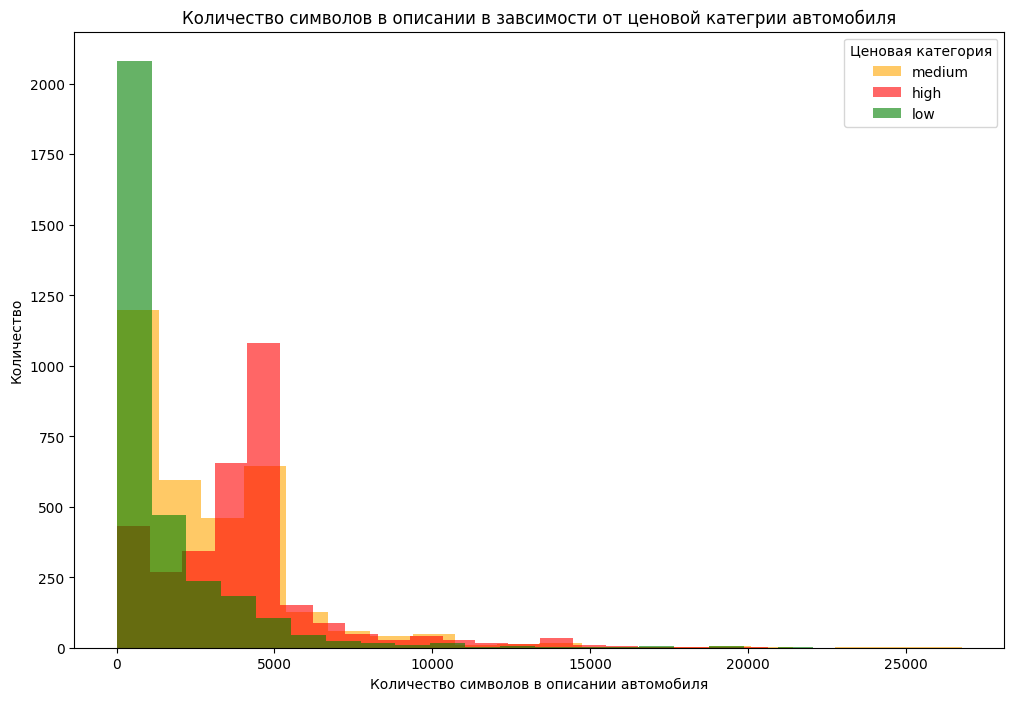

In [ ]:
# значения признака "описание" сложно придать анализу. однако возможно предположить, что чем больше человек хочет продать авто, тем больше он про него расскажет, особенно если цена высокая. или если он демпингует по цене, в любом случае можно проверить.
df['desc_len'] = df.apply(lambda x: len(x.description), axis=1)
colors = {'medium': 'orange', 'high': 'red', 'low': 'green'}

fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df[df['price_category'] == price_category]

    ax.hist(data['desc_len'], color=color, alpha=0.6, bins=20)

plt.ylabel('Количество')
plt.xlabel('Количество символов в описании автомобиля')
plt.title('Количество символов в описании в завсимости от ценовой категрии автомобиля')
plt.legend(colors, title='Ценовая категория');

In [ ]:
df.drop(columns='description', inplace=True) # удаляем прежнюю не информативную клонку с описанием авто

#### Фича - Возростная категория

In [ ]:
df['age_category'] = df.apply(lambda x: "new" if x.year > 2013 else("old" if x.year < 2006 else "average"), axis=1) # форматируем числовую непрерывную переменную год в категариальную
df[['year', 'age_category']].head()

,year,age_category
0,2020,new
1,2016,new
2,2017,new
3,2013,average
4,2021,new


#### Фича - Модель

In [ ]:
model_values = df['model']
unique_model_count = model_values.nunique()

print("Список значений")
print(model_values)

print("Количество уникальных значений", unique_model_count)

Список значений
0          2500 crew cab big horn
1            explorer 4wd 4dr xlt
2                golf r hatchback
3                            rav4
4                          altima
                  ...            
9995                         rav4
9996                     wrangler
9997    a3 2.0t premium plus pzev
9998                      cayenne
9999       1500 crew cab big horn
Name: model, Length: 9687, dtype: object
Количество уникальных значений 3375


In [ ]:
df['model_word_count'] = df.apply(lambda x: len(x.model.split(' ')), axis=1)
df['model_word_count'].value_counts()

model_word_count
1     4310
2     2216
3     1365
4     1186
5      499
6       68
10       8
8        7
11       5
9        5
7        4
13       3
15       3
27       1
21       1
14       1
17       1
24       1
12       1
29       1
22       1
Name: count, dtype: int64

In [ ]:
df['short_model'] = df.apply(lambda x: x.model.split(' ')[0], axis=1)

print("Список моделей")
print(df['short_model'])

print("Количество уникальных значений", df['short_model'].nunique()) # количество уникальных значений велико, при этом некотрые имеют тысячи слов в значении. стоит сократить количество уникальных значений.
df.drop(columns=['model', 'model_word_count'], inplace=True) # и удалить прежнюю колонку

Список моделей
0           2500
1       explorer
2           golf
3           rav4
4         altima
          ...   
9995        rav4
9996    wrangler
9997          a3
9998     cayenne
9999        1500
Name: short_model, Length: 9687, dtype: object
Количество уникальных значений 963


### Кодирование категориальных фичей и Cтандартизация числовых

In [ ]:
df.columns.tolist() # посмотрим на колонки что бы выбрать какие не нужны и их можно удалить

['id',
 'url',
 'region',
 'region_url',
 'year',
 'manufacturer',
 'fuel',
 'title_status',
 'transmission',
 'image_url',
 'state',
 'lat',
 'long',
 'posting_date',
 'price_category',
 'date',
 'odometer_km',
 'odometer/price',
 'price_k$',
 'region_new',
 'desc_len',
 'age_category',
 'short_model']

In [ ]:
df_check = df.copy()
df_check.set_index('id', inplace=True)
df_check.drop(columns=['url', 'region', 'region_url', 'posting_date', 'image_url'], inplace=True) # удаляем не информативные колонки, должно остатья 17 признаков
print(f'Количество полезных признаков: {df_check.shape[1]}\n')

Количество полезных признаков: 17



In [ ]:
df.price_category.value_counts(dropna=False) # проверяем сохранность данных

price_category
high      3245
medium    3230
low       3212
Name: count, dtype: int64

#### Кодирование фичей

In [ ]:
 # выбираем категориальные признаки для кодирования
print(df_check.shape)
df_check.head()

(9687, 17)


,year,manufacturer,fuel,title_status,transmission,state,lat,long,price_category,date,odometer_km,odometer/price,price_k$,region_new,desc_len,age_category,short_model
id,,,,,,,,,,,,,,,,,
7308295377,2020,ram,diesel,clean,other,tn,35.060000,-85.250000,high,2021-04-17 16:30:50+00:00,44164,0.499036,55,chattanooga,4482,new,2500
7316380095,2016,ford,other,clean,automatic,nj,40.821805,-74.061962,medium,2021-05-03 19:40:21+00:00,96598,3.542852,17,newjersey,968,new,explorer
7313733749,2017,volkswagen,gas,clean,other,ca,33.779214,-84.411811,high,2021-04-28 10:52:20+00:00,22608,0.394718,36,reno,4286,new,golf
7308210929,2013,toyota,gas,clean,automatic,nc,35.715954,-78.655304,medium,2021-04-17 14:08:57+00:00,188762,8.089034,14,fayetteville,3241,average,rav4
7316474668,2021,nissan,gas,clean,automatic,ny,40.654800,-73.609700,medium,2021-05-03 22:32:06+00:00,12875,0.366972,22,newyork,538,new,altima


In [ ]:
categorical_variables = ['manufacturer', 'fuel', 'title_status', 'transmission', 'state', 'region_new', 'age_category', 'short_model']
# выведем наименование категории и количество уникальных значений в ней
for col in categorical_variables:
    unique_value_counts = df_check[col].value_counts()
    print(f'\nКатегория: {col}')
    print(unique_value_counts)


Категория: manufacturer
manufacturer
ford               1564
chevrolet          1243
toyota              770
jeep                483
honda               460
nissan              452
ram                 389
other               352
gmc                 343
dodge               321
bmw                 307
volkswagen          250
mercedes-benz       221
hyundai             221
subaru              209
kia                 198
audi                193
cadillac            179
lexus               175
chrysler            159
acura               149
buick               145
mazda               142
infiniti            117
lincoln             109
mitsubishi           82
mini                 69
volvo                66
pontiac              60
rover                57
jaguar               43
porsche              33
mercury              32
tesla                26
saturn               25
fiat                 23
alfa-romeo           13
harley-davidson       4
datsun                2
ferrari               1
Na

In [ ]:
# инициализируем Инкодер
ohe = OneHotEncoder(sparse_output=False)
ohe

OneHotEncoder(sparse_output=False)

In [ ]:
categorical_data = df_check[categorical_variables] # создаем массив только с категориальными данными для преобразования

ohe.fit(categorical_data[categorical_variables]) # тренируем модель кодирования

ohe_data = ohe.transform(categorical_data[categorical_variables]) # преобразовываем данные

# Создаем DataFrame из преобразованной матрицы OneHotEncoding
ohe_data = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(input_features=categorical_variables), index=df_check.index)

print("Размерность преобразованной матрицы:", ohe_data.shape)
print("Преобразованная матрица:")
print(ohe_data)

Размерность преобразованной матрицы: (9687, 1476)
Преобразованная матрица:
            manufacturer_acura  manufacturer_alfa-romeo  manufacturer_audi  \
id                                                                           
7308295377                 0.0                      0.0                0.0   
7316380095                 0.0                      0.0                0.0   
7313733749                 0.0                      0.0                0.0   
7308210929                 0.0                      0.0                0.0   
7316474668                 0.0                      0.0                0.0   
...                        ...                      ...                ...   
7304876387                 0.0                      0.0                0.0   
7316152972                 0.0                      0.0                0.0   
7310993818                 0.0                      0.0                1.0   
7306637427                 0.0                      0.0            

In [ ]:
print('Размерность:', ohe_data.shape)
ohe_data.head() # выводм полученный результат

Размерность: (9687, 1476)


,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,...,short_model_xterra,short_model_xts,short_model_xv,short_model_yaris,short_model_yukon,short_model_z,short_model_z3,short_model_z4,short_model_zephyr,short_model_zx2
id,,,,,,,,,,,,,,,,,,,,,
7308295377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7316380095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7313733749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7308210929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7316474668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Стандартизация фичей

In [ ]:
print(df_check.shape)
df_check.head() # а теперь выберем числовые фичи для преобразования

(9687, 17)


,year,manufacturer,fuel,title_status,transmission,state,lat,long,price_category,date,odometer_km,odometer/price,price_k$,region_new,desc_len,age_category,short_model
id,,,,,,,,,,,,,,,,,
7308295377,2020,ram,diesel,clean,other,tn,35.060000,-85.250000,high,2021-04-17 16:30:50+00:00,44164,0.499036,55,chattanooga,4482,new,2500
7316380095,2016,ford,other,clean,automatic,nj,40.821805,-74.061962,medium,2021-05-03 19:40:21+00:00,96598,3.542852,17,newjersey,968,new,explorer
7313733749,2017,volkswagen,gas,clean,other,ca,33.779214,-84.411811,high,2021-04-28 10:52:20+00:00,22608,0.394718,36,reno,4286,new,golf
7308210929,2013,toyota,gas,clean,automatic,nc,35.715954,-78.655304,medium,2021-04-17 14:08:57+00:00,188762,8.089034,14,fayetteville,3241,average,rav4
7316474668,2021,nissan,gas,clean,automatic,ny,40.654800,-73.609700,medium,2021-05-03 22:32:06+00:00,12875,0.366972,22,newyork,538,new,altima


In [ ]:
quantitative_variabels = ['lat', 'long', 'year', 'odometer_km', 'odometer/price', 'price_k$', 'desc_len']
quantitative_data = df_check[quantitative_variabels]
print('Размерность:', quantitative_data.shape)
quantitative_data.head()

Размерность: (9687, 7)


,lat,long,year,odometer_km,odometer/price,price_k$,desc_len
id,,,,,,,
7308295377,35.060000,-85.250000,2020,44164,0.499036,55,4482
7316380095,40.821805,-74.061962,2016,96598,3.542852,17,968
7313733749,33.779214,-84.411811,2017,22608,0.394718,36,4286
7308210929,35.715954,-78.655304,2013,188762,8.089034,14,3241
7316474668,40.654800,-73.609700,2021,12875,0.366972,22,538


In [ ]:
# инициализируем Скейлер
std_scaler = StandardScaler()
std_scaler

StandardScaler()

In [ ]:
std_scaler.fit(quantitative_data) # тренируем медель

scaled_data = std_scaler.transform(quantitative_data) # преобразовываем данные

quantitative_data = pd.DataFrame(scaled_data, columns=[f'{col}_std' for col in quantitative_data.columns], index=df_check.index)

data = pd.concat([ohe_data, quantitative_data], axis=1) # объединяем категориальный массив и числовой массив

print(f'Размерность матрицы: {data.shape}\n')
data.head() # выводм полученный результат

Размерность матрицы: (9687, 1483)



,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,...,short_model_z4,short_model_zephyr,short_model_zx2,lat_std,long_std,year_std,odometer_km_std,odometer/price_std,price_k$_std,desc_len_std
id,,,,,,,,,,,,,,,,,,,,,
7308295377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.617294,0.486747,1.294713,-1.067071,-0.508070,2.927660,0.625570
7316380095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.389225,1.112916,0.680050,-0.549697,-0.400280,-0.088078,-0.648711
7313733749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.841032,0.533659,0.833716,-1.279768,-0.511764,1.419791,0.554494
7308210929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.502707,0.855837,0.219053,0.359700,-0.239288,-0.326163,0.175546
7316474668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.360051,1.138228,1.448378,-1.375805,-0.512746,0.308729,-0.804641


#### MinMax-нормализация гео-данных

In [ ]:
lat_long = df_check[['lat', 'long']]
lat_long.head()

,lat,long
id,,
7308295377,35.060000,-85.250000
7316380095,40.821805,-74.061962
7313733749,33.779214,-84.411811
7308210929,35.715954,-78.655304
7316474668,40.654800,-73.609700


In [ ]:
# 2. Создание объекта MinMaxScaler
min_max_scal = MinMaxScaler()

# 3. Применение метода fit к признакам lat и long
min_max_scal.fit(lat_long[['lat', 'long']])

# 4. Применение преобразования к данным lat и long
scaled_data = min_max_scal.transform(lat_long[['lat', 'long']])

# 5. Создание нового датафрейма с отмасштабированными данными и новыми именами столбцов
dt = pd.DataFrame(scaled_data, columns=[f"{col}_mm" for col in lat_long.columns], index=df_check.index)

print('Размерность датасета:', dt.shape)
dt.head()

Размерность датасета: (9687, 2)


,lat_mm,long_mm
id,,
7308295377,0.341769,0.288699
7316380095,0.468665,0.333055
7313733749,0.313561,0.292022
7308210929,0.356215,0.314844
7316474668,0.464987,0.334848


In [ ]:
# 6. Объединение нового датафрейма с исходным
data = pd.concat([data, dt], axis=1)

print('Размерность датасета:', data.shape)
# Вывод первых пяти записей датафрейма
data.head()

Размерность датасета: (9687, 1485)


,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,...,short_model_zx2,lat_std,long_std,year_std,odometer_km_std,odometer/price_std,price_k$_std,desc_len_std,lat_mm,long_mm
id,,,,,,,,,,,,,,,,,,,,,
7308295377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.617294,0.486747,1.294713,-1.067071,-0.508070,2.927660,0.625570,0.341769,0.288699
7316380095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.389225,1.112916,0.680050,-0.549697,-0.400280,-0.088078,-0.648711,0.468665,0.333055
7313733749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.841032,0.533659,0.833716,-1.279768,-0.511764,1.419791,0.554494,0.313561,0.292022
7308210929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.502707,0.855837,0.219053,0.359700,-0.239288,-0.326163,0.175546,0.356215,0.314844
7316474668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.360051,1.138228,1.448378,-1.375805,-0.512746,0.308729,-0.804641,0.464987,0.334848


#### Признаки на основе дат

In [ ]:
df['date'] = pd.to_datetime(df['date'], utc=True)
df.date.head()

0   2021-04-17 16:30:50+00:00
1   2021-05-03 19:40:21+00:00
2   2021-04-28 10:52:20+00:00
3   2021-04-17 14:08:57+00:00
4   2021-05-03 22:32:06+00:00
Name: date, dtype: datetime64[ns, UTC]

In [ ]:
df_check['month'] = df_check['date'].apply(lambda x: x.month)
print('Размерность массива данных', df_check.shape)
df_check.month.head()

Размерность массива данных (9687, 18)


id
7308295377    4
7316380095    5
7313733749    4
7308210929    4
7316474668    5
Name: month, dtype: int32

In [ ]:
df_check['dayofweek'] = df_check['date'].dt.dayofweek
print('Размерность массива данных', df_check.shape)
df_check.dayofweek.head()

Размерность массива данных (9687, 19)


id
7308295377    5
7316380095    0
7313733749    2
7308210929    5
7316474668    0
Name: dayofweek, dtype: int32

In [ ]:
df_check['diff_years'] = df_check['date'].dt.year - df_check['year']
print('Размерность массива данных', df_check.shape)
df_check['diff_years'].head()

Размерность массива данных (9687, 20)


id
7308295377    1
7316380095    5
7313733749    4
7308210929    8
7316474668    0
Name: diff_years, dtype: int64

In [ ]:
# Переменная для новый признаков
dated = df_check[['month', 'dayofweek', 'diff_years']]

# Cоздание объекта StandardScaler
std_scaler = StandardScaler()

# применение метода fit к признакам month, dayofweek, diff_years
std_scaler.fit(dated)

# Применение преобразования к данным
scaled_data = std_scaler.transform(dated)

# Создание нового датафрейма с z-преобразованными данными и новыми признаками
dt = pd.DataFrame(scaled_data, columns=[f"{col}_std" for col in dated.columns], index=df_check.index)

print('Размерность массива', dt.shape)
dt.head()

Размерность массива (9687, 3)


,month_std,dayofweek_std,diff_years_std
id,,,
7308295377,-0.615734,1.121456,-1.294713
7316380095,1.624077,-1.375107,-0.680050
7313733749,-0.615734,-0.376482,-0.833716
7308210929,-0.615734,1.121456,-0.219053
7316474668,1.624077,-1.375107,-1.448378


In [ ]:
# Добавление признаков даты в основной массив фичей
data['month_std'] = dt['month_std']
data['dayofweek_std'] = dt['dayofweek_std']
data['diff_years_std'] = dt['diff_years_std']

In [ ]:
# Вывод первых пяти записей массива
print(f'Рзамерность датасета: {data.shape}')
data.head()

Рзамерность датасета: (9687, 1488)


,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,...,year_std,odometer_km_std,odometer/price_std,price_k$_std,desc_len_std,lat_mm,long_mm,month_std,dayofweek_std,diff_years_std
id,,,,,,,,,,,,,,,,,,,,,
7308295377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.294713,-1.067071,-0.508070,2.927660,0.625570,0.341769,0.288699,-0.615734,1.121456,-1.294713
7316380095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.680050,-0.549697,-0.400280,-0.088078,-0.648711,0.468665,0.333055,1.624077,-1.375107,-0.680050
7313733749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.833716,-1.279768,-0.511764,1.419791,0.554494,0.313561,0.292022,-0.615734,-0.376482,-0.833716
7308210929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219053,0.359700,-0.239288,-0.326163,0.175546,0.356215,0.314844,-0.615734,1.121456,-0.219053
7316474668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.448378,-1.375805,-0.512746,0.308729,-0.804641,0.464987,0.334848,1.624077,-1.375107,-1.448378


#### Итог по блоку Feature Engineering и сохранение результатов работы

In [ ]:
print('Размернось', df_check.shape)
df_check.iloc[:, :].head() # из первоночального датафрейма нужна лишь колонка с целевой переменной

Размернось (9687, 20)


,year,manufacturer,fuel,title_status,transmission,state,lat,long,price_category,date,odometer_km,odometer/price,price_k$,region_new,desc_len,age_category,short_model,month,dayofweek,diff_years
id,,,,,,,,,,,,,,,,,,,,
7308295377,2020,ram,diesel,clean,other,tn,35.060000,-85.250000,high,2021-04-17 16:30:50+00:00,44164,0.499036,55,chattanooga,4482,new,2500,4,5,1
7316380095,2016,ford,other,clean,automatic,nj,40.821805,-74.061962,medium,2021-05-03 19:40:21+00:00,96598,3.542852,17,newjersey,968,new,explorer,5,0,5
7313733749,2017,volkswagen,gas,clean,other,ca,33.779214,-84.411811,high,2021-04-28 10:52:20+00:00,22608,0.394718,36,reno,4286,new,golf,4,2,4
7308210929,2013,toyota,gas,clean,automatic,nc,35.715954,-78.655304,medium,2021-04-17 14:08:57+00:00,188762,8.089034,14,fayetteville,3241,average,rav4,4,5,8
7316474668,2021,nissan,gas,clean,automatic,ny,40.654800,-73.609700,medium,2021-05-03 22:32:06+00:00,12875,0.366972,22,newyork,538,new,altima,5,0,0


In [ ]:
df_check.price_category.value_counts(dropna=False)

price_category
high      3245
medium    3230
low       3212
Name: count, dtype: int64

In [ ]:
data1 = data.copy()
price_category = df_check.price_category
data1['price_category'] = df_check.price_category
print("Размерность финального датафрейма:", data1.shape)

Размерность финального датафрейма: (9687, 1489)


In [ ]:
print(data1.price_category.value_counts(dropna=False)) # проверяем, что нет пустых значений

price_category
high      3245
medium    3230
low       3212
Name: count, dtype: int64


In [ ]:
data1.to_csv('vehicles_dataset_prepared.csv', index=False)

## Modeling

In [2]:
!gdown 1B1-tqh3nBqwFL1Fh4M50B0Sdo2u6kpam

Downloading...
From: https://drive.google.com/uc?id=1B1-tqh3nBqwFL1Fh4M50B0Sdo2u6kpam
To: /content/vehicles_dataset_prepared.csv
100% 59.5M/59.5M [00:00<00:00, 97.1MB/s]


In [3]:
dataframe = pd.read_csv('vehicles_dataset_prepared.csv')
dataframe = dataframe.drop(columns=['odometer/price_std', 'price_k$_std'], axis=1) # во избежаниее переобучения моделей на данном датасете, предварительно удаляем фичи, имеющие прямое отношение к целевой переменной
print('Размерность данных {} x {}'.format(dataframe.shape[0], dataframe.shape[1]))
dataframe.head()

Размерность данных 9687 x 1487


,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,...,long_std,year_std,odometer_km_std,desc_len_std,lat_mm,long_mm,month_std,dayofweek_std,diff_years_std,price_category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.486747,1.294713,-1.067071,0.625570,0.341769,0.288699,-0.615734,1.121456,-1.294713,high
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.112916,0.680050,-0.549697,-0.648711,0.468665,0.333055,1.624077,-1.375107,-0.680050,medium
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.533659,0.833716,-1.279768,0.554494,0.313561,0.292022,-0.615734,-0.376482,-0.833716,high
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.855837,0.219053,0.359700,0.175546,0.356215,0.314844,-0.615734,1.121456,-0.219053,medium
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.138228,1.448378,-1.375805,-0.804641,0.464987,0.334848,1.624077,-1.375107,-1.448378,medium


In [4]:
x = dataframe.drop(columns='price_category', axis=1) # инициализируем фичи
y = dataframe['price_category'] # инициализируем целевую переменную

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=42) # разбиваем датасет на тренировочную и тестовую выборки

### Настройка, обучение и тюнинг моделей

#### Логистическая регрессия

In [9]:
logreg = LogisticRegression(C = 3,
                            max_iter = 1000,
                            random_state=42
                            )
logreg # инициализируем логистическую регрессию

LogisticRegression(C=3, max_iter=1000, random_state=42)

In [10]:
logreg.fit(x_train, y_train)

# Предикт для тернировочного и тестового массивов
pred1 = logreg.predict(x_train)
pred2 = logreg.predict(x_test)

# Метрика точности предсказания модели
print(f"Tuned logistic regression train accuracy: {acc(pred1, y_train):.3f}")
print(f"Tuned logistic regression test accuracy: {acc(pred2, y_test,):.3f}")
cm(pred2, y_test) # модель показывает хорошие показатели на тестовой и тренировочных массивах.

Tuned logistic regression train accuracy: 0.870
Tuned logistic regression test accuracy: 0.766


array([[815,  25, 138],
       [ 25, 774, 179],
       [142, 170, 639]])

In [11]:
# Выполнение кросс-валидации с использованием метрики Accuracy
cv_scores = cvs(logreg, x, y, cv=4, scoring='accuracy')

# Вычисление средней и стандартного отклонения оценок точности
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

# Печать средней и стандартного отклонения оценок точности
print("Средняя точность:", round(mean_accuracy, 3))
print("Стандартное отклонение точности:", round(std_accuracy, 3)) # отклонение не большое, значит модель логистической регрессии не переобучается

Средняя точность: 0.771
Стандартное отклонение точности: 0.003


#### Модель случайного леса

In [12]:
# Случайный лес
rfc = RFC(max_depth=1000,
          min_samples_leaf=3,
          min_samples_split=5,
          n_estimators=100,
          random_state=42
          )
rfc # инициализируем случайный лес
rfc.fit(x_train, y_train)

# Предикт для тернировочного и тестового массивов
rfc_pred1 = rfc.predict(x_train)
rfc_pred2 = rfc.predict(x_test)

# Метрика точности предсказания модели
print(f"RandomForestClassifier train accuracy: {acc(rfc_pred1, y_train):.3f}")
print(f"RandomForestClassifier test accuracy: {acc(rfc_pred2, y_test,):.3f}")
cm(rfc_pred2, y_test) # случайный лес не показал переобучения, но гипер-параметры следует перебрать, для подятия метрики модели.

RandomForestClassifier train accuracy: 0.782
RandomForestClassifier test accuracy: 0.725


array([[788,  24, 185],
       [ 55, 839, 290],
       [139, 106, 481]])

In [16]:
# Настройка гипер-параметров с помощью RandomizedSearchCV
param_dist = {
    'n_estimators': list(range(100, 501, 100)),
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'bootstrap': [True, False]
}

rfc_tuned = RFC(random_state=42)

# Инициализация объекта RandomizedSearchCV
random_search = RSCV(estimator=rfc_tuned,
                     param_distributions=param_dist,
                     cv=4, # указываем параметр cv для прменения кросс-валидации
                     n_iter=20,
                     scoring='accuracy',
                     verbose=1,
                     n_jobs=-1
)

# Подгонка модели
random_search.fit(x_train, y_train)

best_params = random_search.best_params_

Fitting 4 folds for each of 20 candidates, totalling 80 fits


In [23]:
print(best_params) # Выводим на экран лучшие гипер-параметры

{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}


In [25]:
rfc_tuned = RFC(**best_params)

rfc_tuned.fit(x_train, y_train) # Переобучение модели с новыми гипер-параметрами
rfc_tuned_pred1 = rfc_tuned.predict(x_train) # Предикт для тернировочного и тестового массивов
rfc_tuned_pred2 = rfc_tuned.predict(x_test)

# Метрика точности предсказания модели
print(f"RandomForestClassifier train accuracy: {acc(rfc_tuned_pred1, y_train):.3f}")
print(f"RandomForestClassifier test accuracy: {acc(rfc_tuned_pred2, y_test):.3f}")
cm(rfc_tuned_pred2, y_test)

RandomForestClassifier train accuracy: 1.000
RandomForestClassifier test accuracy: 0.768


array([[806,  16, 129],
       [ 30, 808, 208],
       [146, 145, 619]])

In [26]:
# Оценка качества новой модели с использованием кросс-валидации
cv_scores = cvs(rfc_tuned, x, y, cv=4)
print("Cross-Validation Scores:", cv_scores)
print("Средняя точность:", round(cv_scores.mean(), 3))
print("Стандартное отклонение точности:", round(cv_scores.std(), 3))
# модель на трейне обучалась не плохо, разница между трейном и тестом меньше 30 процентов.
# а стандартное отклонение при кросс-валидации 1% - нет проблемы переобучения. но качество на тесте оставляет желать лучшего

Cross-Validation Scores: [0.77374071 0.77250206 0.77869529 0.75753821]
Средняя точность: 0.771
Стандартное отклонение точности: 0.008


#### Многослойный персептрон

In [ ]:
mlp = MLP(hidden_layer_sizes=(100, 20),
          activation='tanh',
          solver='adam',
          learning_rate_init=0.01,
          alpha=0.0001,
          max_iter=1000,
          random_state=42
          )
mlp # инициализируем многослойный персепторн

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 20),
              learning_rate_init=0.01, max_iter=1000, random_state=42)

In [ ]:
mlp.fit(x_train, y_train)

# Предикт для тернировочного и тестового массивов
mlp_pred1 = mlp.predict(x_train)
mlp_pred2 = mlp.predict(x_test)

# Метрика точности предсказания модели
print(f"MLPClassifier train accuracy: {acc(mlp_pred1, y_train):.3f}")
print(f"MLPClassifier test accuracy: {acc(mlp_pred2, y_test,):.3f}")
cm(mlp_pred2, y_test) # посмотрим можно ли улучшить результаты на тестовой выборке

MLPClassifier train accuracy: 0.998
MLPClassifier test accuracy: 0.778


array([[812,  28, 121],
       [ 29, 762, 147],
       [141, 179, 688]])

In [5]:
# Настройка гипер-параметров с помощью RandomizedSearchCV
# Инициализируем объект RandomizedSearchCV для подбора оптимальных параметров MLPClassifier
parameters = {
    'hidden_layer_sizes': [(5, 5), (10, 10), (20, 20), (50, 50), (100, 100), (100, 20)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}
# укажем параметр cv=5 для кросс-валидации для борьбы с переобучением модели
mlp = MLP(max_iter=1000, random_state=42)
random_search_mlp = RSCV(mlp, parameters, n_iter=5, scoring='accuracy', cv=5, verbose=1, random_state=42, n_jobs=-1)

random_search_mlp.fit(x_train, y_train)

print(random_search_mlp.best_params_)


# Инициализируем MLPClassifier с оптимальными параметрами
best_mlp = MLP(**random_search_mlp.best_params_)
best_mlp.fit(x_train, y_train)
# Предикт для тернировочного и тестового массивов
best_mlp_pred1 = best_mlp.predict(x_train)
best_mlp_pred2 = best_mlp.predict(x_test)
# Метрика точности предсказания модели
print(f"Best Tuned MLPClassifier train accuracy: {acc(best_mlp_pred1, y_train):.3f}")
print(f"Best Tuned MLPClassifier test accuracy: {acc(best_mlp_pred2, y_test):.3f}")
cm(best_mlp_pred2, y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'mean_fit_time': array([450.08295684, 146.9044435 , 160.66257133, 705.8203402 ,
       149.20538917]), 'std_fit_time': array([20.58749387, 11.84082355, 12.63095234, 20.30638878, 10.83914737]), 'mean_score_time': array([0.05774961, 0.05781016, 0.04385581, 0.08262234, 0.08665376]), 'std_score_time': array([0.02042852, 0.01875331, 0.00411961, 0.02258404, 0.02681023]), 'param_solver': masked_array(data=['sgd', 'adam', 'adam', 'sgd', 'adam'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=['constant', 'constant', 'constant', 'adaptive',
                   'constant'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_hidden_layer_sizes': masked_array(data=[(20, 20), (10, 10), (5, 5), (100, 20), (20, 20)],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_alpha': masked_a

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Tuned MLPClassifier train accuracy: 0.850
Best Tuned MLPClassifier test accuracy: 0.791


array([[825,  20, 116],
       [ 15, 801, 168],
       [142, 148, 672]])

In [8]:
# Оценка качества новой модели персепторна с использованием кросс-валидации
best_mlp_cv_scores = cvs(best_mlp, x, y, cv=5)
print("Tuned MLP Cross-Validation Scores:", best_mlp_cv_scores)
print("Средняя точность:", round(best_mlp_cv_scores.mean(), 3))
print("Стандартное отклонение точности:", round(best_mlp_cv_scores.std(), 3))
# на тюнингованной модели показатель на трейне упал - что хорошо, значит новая модель не страдает переобучением, в том числе потому, что разница метрики трейна с метрикой на тесте сократилась - около 6%
# показатель акураси новой модели на тесте подрос на 2 процента - не плохо почти 80 предсказательная способность теста.
# но самое главное стандартное отклонение при кросс-валидации составлет 0.006 или 0.6 процента - значит модель гибко работает с не известными данными.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Tuned MLP Cross-Validation Scores: [0.78844169 0.7997936  0.79297883 0.79039752 0.80485287]
Средняя точность: 0.795
Стандартное отклонение точности: 0.006


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Results

In [28]:
print(f"Tuned logistic regression train accuracy: {acc(pred1, y_train):.3f}")
print(f"Tuned logistic regression test accuracy: {acc(pred2, y_test,):.3f}")
print("Средняя точность логистической регруссии при кросс-валидации:", round(mean_accuracy, 3))
print(f"Стандартное отклонение логистической регресси при кросс-валидации: {std_accuracy:.3f}")

Tuned logistic regression train accuracy: 0.870
Tuned logistic regression test accuracy: 0.766
Средняя точность логистической регруссии при кросс-валидации: 0.771
Стандартное отклонение логистической регресси при кросс-валидации: 0.003


In [29]:
print(f"RandomForestClassifier train accuracy: {acc(rfc_tuned_pred1, y_train):.3f}")
print(f"RandomForestClassifier test accuracy: {acc(rfc_tuned_pred2, y_test):.3f}")
print("Средняя точность:", round(cv_scores.mean(), 3))
print("Стандартное отклонение точности модели случайного леса при кросс-валидации:", round(cv_scores.std(), 3))

RandomForestClassifier train accuracy: 1.000
RandomForestClassifier test accuracy: 0.768
Средняя точность: 0.771
Стандартное отклонение точности модели случайного леса при кросс-валидации: 0.008


In [30]:
print(f"Best Tuned MLPClassifier train accuracy: {acc(best_mlp_pred1, y_train):.3f}")
print(f"Best Tuned MLPClassifier test accuracy: {acc(best_mlp_pred2, y_test):.3f}")
print("Средняя точность:", round(best_mlp_cv_scores.mean(), 3))
print("Стандартное отклонение точности:", round(best_mlp_cv_scores.std(), 3))

Best Tuned MLPClassifier train accuracy: 0.850
Best Tuned MLPClassifier test accuracy: 0.791
Средняя точность: 0.795
Стандартное отклонение точности: 0.006


**Лучшей моделью со стандартным отклонением 0.3 процента показала себя логистическая регрессия. У нее так же высокий показатель акураси на трейне 87% и на тесте 76%**

на Втором месте многослойный персептрон с показателем стандартного отклонения  0.6 процента. У него же самый высокие показатель акураси на тесте 0.795

К сожалению, при нескольких подходах с одними и теми же гипер-параметрами, прежде найенными случайным поиском, модель случайного леса оказалась переробученной что показывают метрики акураси на трейне и тесте. Хотя в первом подходе, трейн тюингованного случаного леса был порядка 0.998.

In [31]:
# Обучаю логистическую модельна всем датасете. среди фичей отсутсвуют фичи 'odometer/price_std', 'price_k$_std'
logreg.fit(x, y)

LogisticRegression(C=3, max_iter=1000, random_state=42)

In [34]:
# Сохранаяю модель в файл
filename = "logreg_model.pickle"
with open(filename, 'wb') as file:
    pickle.dump(logreg, file)